**Implement logistic regression on a social network dataset**

## Data preprocessing

### Import modules

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Import dataset
- four features: ID, Gender, Age, Salary
- output: whether or not buy SUV
- our task: predict a user will or will not buy SUV based on feature age and salary 

In [27]:
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(dataset.head())
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values
print("Original data shape X:{}, Y:{}".format(X.shape, Y.shape))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Original data shape X:(400, 2), Y:(400,)


### Splitting dataset

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, 
                                                    random_state = 0)

## Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/home/huiwen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 2:  Train a logistic model
- train logistic model with sklearn 

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3: Prediction

In [31]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


## Step 4: Evaluation
- draw confusion matrix to see whether our model works correctly

Confusion matrix, without normalization


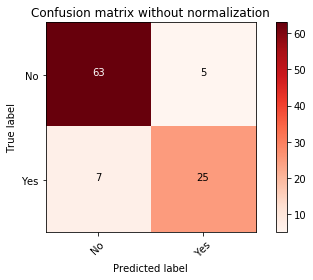

In [32]:
from sklearn.metrics import  confusion_matrix
import itertools

# utlis function used to draw confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
cm = confusion_matrix(Y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=['No', 'Yes'], 
                      title="Confusion matrix without normalization")
